In [232]:
import pyedflib
import mylib
import mvar
import mygraph
import numpy as np
import pandas as pd
from igraph import Graph
import re
import igraph
import os
import importlib
importlib.reload(mylib)
from pylab import hist
import math

In [226]:
case_open = "./data/S001R01.edf"
case_closed = "./data/S001R02.edf"

#### 1.1

Estimate functional brain connectivity among 64 channels using one of the MVAR estimators: 

- Partial Directed Coherence (PDC), 
- Direct Transfer Function (DTF). 

Select **one relevant frequency value**. 

Apply a **threshold** so that the resulting binary connectivity matrices have network density equal to 20%. 

Create a graphical representation of the binary adjacency matrix.

In [150]:
Gd = mylib.receive_data(path = case_open, freq = 10, threshold=0.05, DTF = True)

Loading data from ./data/S001R01.edf ...
...done
Computing DFT...
... done
Building network to analyse interactions at 10 Hz
Applying a threshold on network density of 5 % ...
... done


#### 1.2 

Perform task 1.1 using PDC estimator also 

In [3]:
Gp = mylib.receive_data(path = case_open, freq = 10, threshold=0.05, DTF = False)

Loading data from ./data/S001R01.edf ...
...done
Computing PDC
... done
Building network to analyse interactions at 10 Hz
Applying a threshold on network density of 5 % ...
... done


#### 1.3 

Perform task 1.1 using thresholds yielding the following density values: 1%, 5%, 10%, 20%, 30%, 50%.

In [5]:
densities = [0.05, 0.1, 0.2, 0.3, 0.5]
densities = densities[::-1]
graphs_over_densities = []
for density in densities:
    graphs_over_densities.append(mylib.receive_data(path = case_open, freq = 10, threshold=density, DTF = False))
graphs_over_densities

Loading data from ./data/S001R01.edf ...
...done
Computing PDC
... done
Building network to analyse interactions at 10 Hz
Applying a threshold on network density of 50 % ...
... done
Loading data from ./data/S001R01.edf ...
...done
Computing PDC
... done
Building network to analyse interactions at 10 Hz
Applying a threshold on network density of 30 % ...
... done
Loading data from ./data/S001R01.edf ...
...done
Computing PDC
... done
Building network to analyse interactions at 10 Hz
Applying a threshold on network density of 20 % ...
... done
Loading data from ./data/S001R01.edf ...
...done
Computing PDC
... done
Building network to analyse interactions at 10 Hz
Applying a threshold on network density of 10 % ...
... done
Loading data from ./data/S001R01.edf ...
...done
Computing PDC
... done
Building network to analyse interactions at 10 Hz
Applying a threshold on network density of 5 % ...
... done


#### 1.5

Make a topographical representation of the networks.

In [189]:
def testplot(G, name, visual_style):
    #G = G.simplify(multiple = False, loops = True, combine_edges = None)
    #G.delete_vertices(G.degree() == 0)
    out = igraph.plot(G, bbox=(0, 0, 600, 600), **visual_style)
    out.save(name + '.png')
    
    return out

In [227]:
# defining the layout for topographical representations
visual_style = {}
visual_style["vertex_size"] = 25
visual_style["vertex_color"] = "white"
visual_style["vertex_label"] = Gp.vs["label"]
visual_style["edge_width"] = [math.exp(weight)*0.5 for weight in Gp.es["weight"]]
visual_style["layout"] = Gp.vs["coordinates"]

Create a graph representation of both the case studies.

In [7]:
G_open = Gp # this has been already calcuated
G_closed = mylib.receive_data(path = case_closed, freq = 10, threshold=0.05, DTF = False)

Loading data from ./data/S001R02.edf ...
...done
Computing PDC
... done
Building network to analyse interactions at 10 Hz
Applying a threshold on network density of 5 % ...
... done


Topographical representation EO

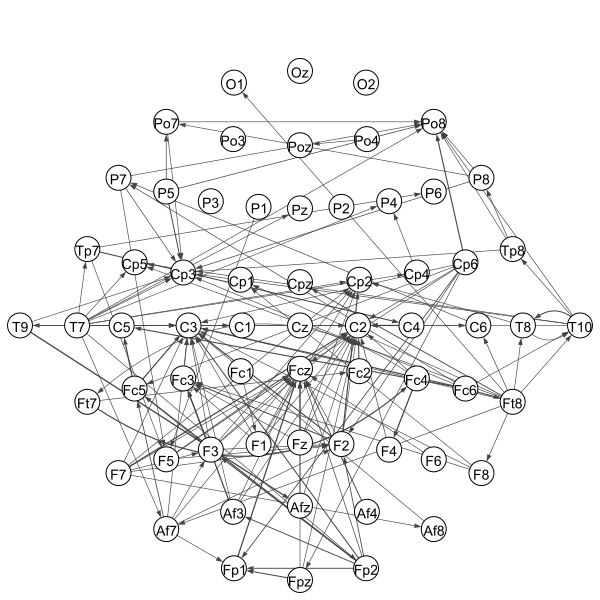

In [45]:
testplot(G = G_open, name = "open_top_repr", visual_style=visual_style)

Topographical representation EC

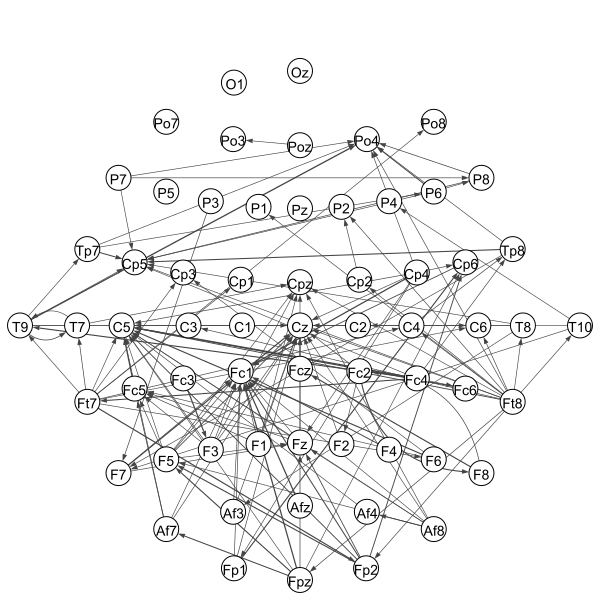

In [46]:
testplot(G = G_open, name = "closed_top_repr", visual_style=visual_style)

#### 1.6 

Perform task 1.1 considering a **second frequency value** belonging to a **different EEG rhythm** with respect to the first choice.

In [46]:
Gd = receive_data(case_open, freq = 28, threshold = 0.1, DTF = True) # here we plug in a different frequency

Loading data from ./data/S001R01.edf ...
...done
Computing DFT...
... done
Building network to analyse interactions at 28 Hz
Applying a threshold on network density of 10 % ...
... done


#### 2.1

Compute 

- binary global (clustering coefficient, path length) graph indices
- local (degree,in/out-degree) graph indices. 

List the highest 10 channels for local indices - case EO

In [229]:
mylib.graph_indices(G_open, weights=False)

Macroscopic Network Analysis
global clustering coefficient =  0.629
global average path lenght =  1.682
Microscopic Network Analysis
Top 10 channels by degree
 channel
Afz    34.0
Po4    24.0
Pz     20.0
F4     14.0
P5     13.0
P4     13.0
P2     12.0
P6     11.0
F1      9.0
Name: degree, dtype: float64
Top 10 channels by OUT degree
 channel
Po8    5.0
Poz    5.0
Iz     4.0
P1     4.0
F7     4.0
Ft7    4.0
Ft8    4.0
Af7    4.0
T8     4.0
Name: out-degree, dtype: float64
Top 10 channels by IN degree
 channel
Afz    31.0
Po4    22.0
Pz     16.0
F4     12.0
P5     10.0
P4     10.0
P2      9.0
P6      8.0
Fz      6.0
Name: in-degree, dtype: float64


List the highest 10 channels for local indices - case EC

In [230]:
mylib.graph_indices(G_closed, weights=False)

Macroscopic Network Analysis
global clustering coefficient =  0.761
global average path lenght =  1.773
Microscopic Network Analysis
Top 10 channels by degree
 channel
Po8    30.0
Po4    29.0
Oz     19.0
P5     18.0
Po7    17.0
P4     14.0
F4     13.0
Pz     11.0
Poz     8.0
Name: degree, dtype: float64
Top 10 channels by OUT degree
 channel
O1     5.0
Fp1    5.0
F6     5.0
Fc5    4.0
Ft8    4.0
Af7    4.0
Af3    4.0
Afz    4.0
F7     4.0
Name: out-degree, dtype: float64
Top 10 channels by IN degree
 channel
Po4    27.0
Po8    26.0
P5     16.0
Oz     13.0
Po7    13.0
P4     12.0
F4     10.0
Pz      7.0
Poz     5.0
Name: in-degree, dtype: float64


#### 2.2

Search in the literature a definition of **small-worldness index** and compute it.

In [248]:
def swi(Gd):
    
    import bct
    print("Calculating Small World Index...")

    Actual = np.array(Gd.get_adjacency(attribute = "weight").data)
    Lattice, a, b, iter2 = bct.latmio_dir(Actual, 10, D = None)

    # Bootstrap
    B = 20
    Lr = list()
    Cr = list()
    for i in range(B):
        print(i)
        Random, iter1 = bct.randmio_dir(Actual, 10)
        Lr.append(Graph.Weighted_Adjacency(Random.tolist(), mode = 0).average_path_length(directed = True))
        Cr.append(Graph.Weighted_Adjacency(Random.tolist(), mode = 0).transitivity_undirected())


    Lr_mean = sum(Lr)/float(len(Lr))
    Cr_mean = sum(Cr)/float(len(Cr))


    L = Graph.Weighted_Adjacency(Actual.tolist(), mode = 0).average_path_length(directed = True)
    Ll = Graph.Weighted_Adjacency(Lattice.tolist(), mode = 0).average_path_length(directed = True)

    C = Graph.Weighted_Adjacency(Actual.tolist(), mode = 0).transitivity_undirected()
    Cl = Graph.Weighted_Adjacency(Lattice.tolist(), mode = 0).transitivity_undirected()

    SWI = mylib.swi(L, Ll, Lr_mean, C, Cl, Cr_mean)

    return SWI, (L-Ll)/(Lr_mean-Ll), (C-Cr_mean)/(Cl-Cr_mean)

In [249]:
print("SWI=", swi(G_open)[0], "for EO case study")

Calculating Small World Index...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
SWI= -0.25733693180336126 for EO case study


In [250]:
print("SWI=", swi(G_closed)[0], "for EC case study")

Calculating Small World Index...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
SWI= 0.6652788356727367 for EC case study


#### 2.4

Study the behaviour of global graph indices in function of network density (see point 2.3 for density values).

Studying the behaviour of global graph indices in function of network density...
Ploting the result of the analysis


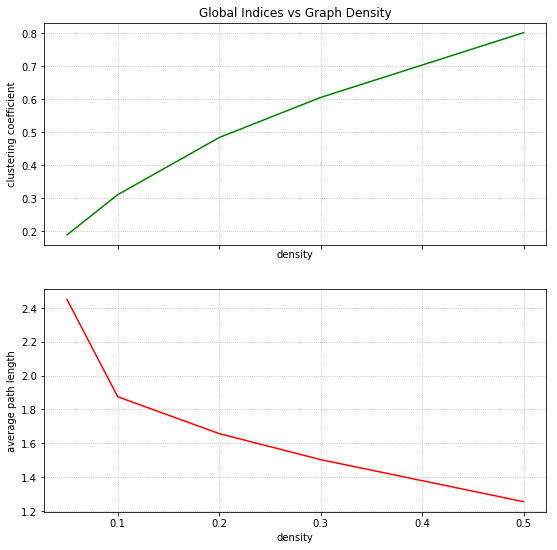

In [25]:
#%% 2.4 Study the behaviour of global graph indices in function of network density
print("Studying the behaviour of global graph indices in function of network density...")
densities = [0.05, 0.1, 0.2, 0.3, 0.5] # edit these with the ones provided by the prof

clustering_coeffs = []
average_path_lengths =  []
# there is a specific reason why we start from higher densities and then we
# decrease it: the function applyThreshold takes a graph and simply picks less 
# important edges (to which correspond low weights) erasing them from the network:
# to do that it has to find the minimum above N* x N* weights. 
# This is quite computationally expensive in our simple implementation:
# to speed up a bit our analysis we put the function in the condition of having
# at each step a smaller amount N*, avoiding to replicate the same minimizations
# multiple times
D, freqs = mvar.DTF(A_est, sigma, T)
freq = 10
D = D[np.where(freqs == mylib.find_nearest(freqs, freq)),:,:].reshape(64, 64)
Gd = Graph.Weighted_Adjacency(D.tolist(), mode = 0)
for density in densities[::-1]:
    Gd = mygraph.applyTreshold(Gd, density)
    clustering_coeffs.append(Gd.transitivity_undirected())
    average_path_lengths.append(Gd.average_path_length(directed = False, unconn=True))
print("Ploting the result of the analysis")
mylib.plot_analysis(densities, clustering_coeffs, average_path_lengths)

#### 2.5 

Make a Topographical representation of local indices

Topographical representation of weighted degree


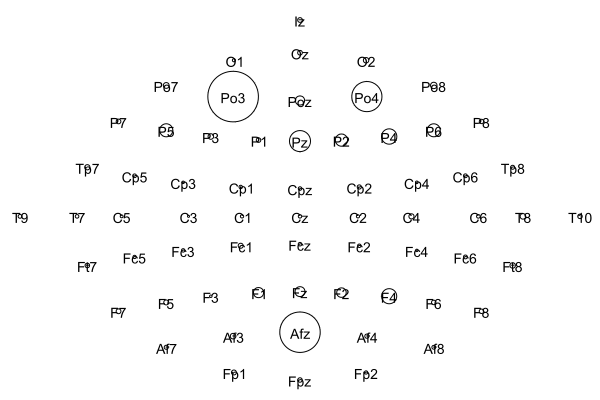

In [7]:
#%% 2.5 Make a Topographical representation of local indices
import matplotlib.pyplot as plt

Gd.vs["strength"] = Gd.strength(mode = 3, weights = "weight")
Gd.vs["in-strenght"] = Gd.strength(mode = 2, weights = "weight")
Gd.vs["out-strength"] = Gd.strength(mode = 1, weights = "weight")

visual_style["vertex_size"] = [3* strength for strength in Gd.vs["strength"]]
visual_style["edge_width"] = 0

print("Topographical representation of weighted degree")
testplot(G = G_open, name = "open_degree", visual_style=visual_style)
testplot(G = G_closed, name = "closed_degree", visual_style=visual_style)

Topographical representation of weighted in-degree


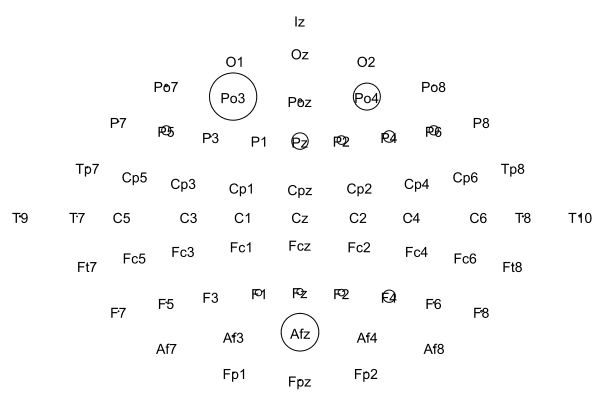

In [8]:
visual_style["vertex_size"] = [3* strength for strength in Gd.vs["in-strenght"]]
visual_style["edge_width"] = 0
print("Topographical representation of weighted in-degree")
testplot(G = G_open, name = "open_inDegree", visual_style=visual_style)
testplot(G = G_closed, name = "closed_inDegree", visual_style=visual_style)

Topographical representation of weighted out-degree


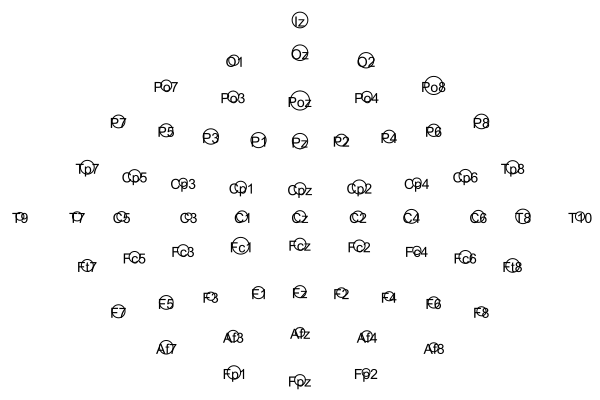

In [9]:
visual_style["vertex_size"] = [10* strength for strength in Gd.vs["out-strength"]]
visual_style["edge_width"] = 0

print("Topographical representation of weighted out-degree")
testplot(G = G_open, name = "open_outDegree", visual_style=visual_style)
testplot(G = G_closed, name = "closed_outDegree", visual_style=visual_style)

#### 2.7

Perform point 2.1 considering the **weighted** version of the **graph indices**

In [233]:
mylib.graph_indices(G_open, weights=True)

Macroscopic Network Analysis
global clustering coefficient =  1.006
global average path lenght =  1.682
	 the latter is calculated regardless from the weights
Microscopic Network Analysis
Top 10 channels by generalized degree
 channel
Afz    13.473430
Po4    10.041832
Pz      7.020175
P4      5.114191
F4      5.039221
P5      4.351623
P6      4.329907
P2      4.069092
F1      3.367227
Name: strength, dtype: float64
Top 10 channels by generalized OUT degree
 channel
Po8    1.813204
Fc1    1.675881
Iz     1.572640
Oz     1.563477
O2     1.540559
P3     1.538286
Pz     1.534867
P1     1.512976
P8     1.460260
Name: out-strength, dtype: float64
Top 10 channels by generalized IN degree
 channel
Afz    12.541498
Po4     9.003333
Pz      5.485308
F4      4.119901
P4      3.849173
P6      3.095992
P5      3.044212
P2      2.886456
F2      2.196047
Name: in-strength, dtype: float64


In [234]:
mylib.graph_indices(G_closed, weights=True)

Macroscopic Network Analysis
global clustering coefficient =  nan
global average path lenght =  1.773
	 the latter is calculated regardless from the weights
Microscopic Network Analysis
Top 10 channels by generalized degree
 channel
Po4    10.966829
Po8     9.209896
P5      6.112822
Oz      5.713749
Po7     5.543664
P4      5.058449
F4      4.149901
Pz      3.568913
Poz     3.020856
Name: strength, dtype: float64
Top 10 channels by generalized OUT degree
 channel
O1     1.723295
Po8    1.601698
Cp4    1.600730
Fp1    1.597545
Pz     1.597147
F6     1.571468
Cp2    1.559048
P1     1.557687
Po7    1.526855
Name: out-strength, dtype: float64
Top 10 channels by generalized IN degree
 channel
Po4    9.879788
Po8    7.608199
P5     5.063697
Po7    4.016809
P4     3.996401
Oz     3.713296
F4     3.057409
Pz     1.971766
Poz    1.717109
Name: in-strength, dtype: float64


#### 3

Motif Analysis

In [204]:
#%% 3 Motif analysis

G_open = mylib.receive_data(path = case_open, freq = 10, threshold=0.05, DTF = True)
G_closed = mylib.receive_data(path = case_closed, freq = 10, threshold=0.05, DTF = True)

Loading data from ./data/S001R01.edf ...
...done
Computing DFT...
... done
Building network to analyse interactions at 10 Hz
Applying a threshold on network density of 5 % ...
... done
Loading data from ./data/S001R02.edf ...
...done
Computing DFT...
... done
Building network to analyse interactions at 10 Hz
Applying a threshold on network density of 5 % ...
... done


In [205]:
path = './data/motifAnalysis_OPEN.txt'
print("Writing input file for Motif Analysis to", path, "...")
os.remove(path)
mylib.write_inputFileForMotifAnalysis(G_open, file = path)
print("\n.. done")

path = './data/motifAnalysis_CLOSED.txt'
print("Writing input file for Motif Analysis to", path, "...")
os.remove(path)
mylib.write_inputFileForMotifAnalysis(G_closed, file = path)
print("\n.. done")

Writing input file for Motif Analysis to ./data/motifAnalysis_OPEN.txt ...

.. done
Writing input file for Motif Analysis to ./data/motifAnalysis_CLOSED.txt ...

.. done


In [202]:
def count_app_in_motif(G, path, name):
    motifs = pd.read_csv(path, sep = "\t" , skiprows = 5, header = None)
    G.es["appear_in_mot"] = [0 for i in G.es]
    for motif in range(motifs.shape[0]): # connections.shape[0]
        A = int(motifs.iloc[[motif]][0])
        B = int(motifs.iloc[[motif]][1])
        C = int(motifs.iloc[[motif]][2])
        
        G.es[G.get_eid(B, C)]["appear_in_mot"] += 1 
        G.es[G.get_eid(A, C)]["appear_in_mot"] += 1 
        
    visual_style = {}
    G.es["arrow_size"] = [0.1 for edge in G.es]
    visual_style["vertex_size"] = 30
    visual_style["vertex_color"] = "white"
    visual_style["vertex_label"] = G.vs["label"]
    #norm = sum(G.es["appear_in_mot"])
    visual_style["edge_width"] = [0.1 * app for app in G.es["appear_in_mot"]]
    visual_style["layout"] = G.vs["coordinates"]

    return(testplot(G = G, name = name, visual_style=visual_style))

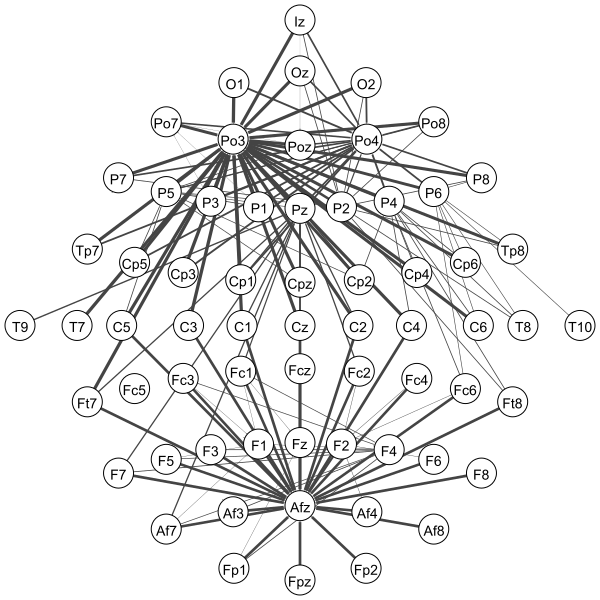

In [211]:
count_app_in_motif(G_open, "./data/motifAnalysis_OPEN_MEMBERS.txt", "motif_open")

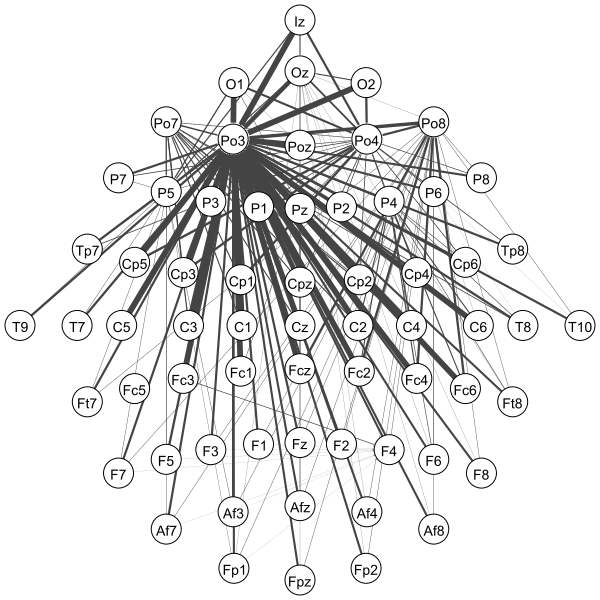

In [212]:
count_app_in_motif(G_closed, "./data/motifAnalysis_CLOSED_MEMBERS.txt", "motif_closed")

In [219]:
def count_motifs_given_node(G, label):
    sub = G.subgraph(G.neighborhood(G.vs.select(label = label)[0].index))
    counts = list(sub.triad_census())
    motifs = ["A,B,C,", 
             "A->B, C ", 
             "A<->B, C", 
             "A<-B->C", 
             "A->B<-C", 
             "A->B->C", 
             "A<->B<-C", 
             "A<->B->C", 
             "A->B<-C, A->C", 
             "A<-B<-C, A->C", 
             "A<->B<->C",
             "A<-B->C, A<->C", 
             "A->B<-C, A<->C", 
             "A->B->C, A<->C", 
             "A->B<->C, A<->C",
             "A<->B<->C, A<->C"]

    motifs = pd.DataFrame({"motif": motifs, "counts": counts})
    motifs.sort_values("counts", ascending = False, inplace = True)
    motifs.set_index("motif", inplace = True)
    return motifs

In [222]:
count_motifs_given_node(G_open, "Po3")

,counts
motif,
"A,B,C,",4961
"A->B, C",1244
A->B<-C,792
"A->B<-C, A->C",62
A->B->C,35
"A<-B->C, A<->C",20
A<->B<-C,14
A<-B->C,12
"A<->B, C",0


In [224]:
count_motifs_given_node(G_closed, "Po3")

,counts
motif,
"A,B,C,",33344
"A->B, C",5177
A->B<-C,2662
A->B->C,131
"A->B<-C, A->C",129
A<->B<-C,99
"A<->B, C",41
"A<-B->C, A<->C",40
A<-B->C,36


#### 4

Community detection

In [134]:
def louvain(G):
    import louvain
    louvain.set_rng_seed(123452)
    G.vs['degree'] = G.degree()
    #G = np.matrix(G.get_adjacency(attribute='weight').data)
    #G = pos_Igraph(G,do_plot=False)
    partition = louvain.find_partition(G, louvain.ModularityVertexPartition,weights=G.es['weight'])
    
    return(partition, G)

In [135]:
part_open,G_open = louvain(G_open)
print("The estimated number of communities for eyes-open case is",len(set(part_open.membership)))
print('\n')
print("Communities")
for n in range(0,len(part_open)):
    print('Community number', n, '- size:', len(part_open[n]))
    
#Create a dictionary whith keys as channels (names of our nodes) and values the community they belong
print("Case: eyes-open")
comm_detect = dict(zip(G_open.vs['label'], part_open.membership))
print("A dictionary whith keys as channels (names of our nodes) and values the community they belong:")
print('\n')
new_dict = {}
for pair in comm_detect.items():
    if pair[1] not in new_dict.keys():
        new_dict[pair[1]] = []

    new_dict[pair[1]].append(pair[0])

print(dict(sorted(new_dict.items())))

The estimated number of communities for eyes-open case is 4


Communities
Community number 0 - size: 31
Community number 1 - size: 21
Community number 2 - size: 11
Community number 3 - size: 1
Case: eyes-open
A dictionary whith keys as channels (names of our nodes) and values the community they belong:


{0: ['Fc5', 'Fc3', 'Fc1', 'Fcz', 'Fc2', 'Fc4', 'C5', 'C3', 'C1', 'Cz', 'C2', 'Cpz', 'Fp1', 'Fpz', 'Fp2', 'Af7', 'Af3', 'Afz', 'Af4', 'Af8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'Ft7', 'T7', 'Pz'], 1: ['Cp5', 'Cp3', 'Cp1', 'Cp2', 'T9', 'Tp7', 'P7', 'P5', 'P3', 'P1', 'P2', 'P8', 'Po7', 'Po3', 'Poz', 'Po4', 'Po8', 'O1', 'Oz', 'O2', 'Iz'], 2: ['Fc6', 'C4', 'C6', 'Cp4', 'Cp6', 'Ft8', 'T8', 'T10', 'Tp8', 'P4', 'P6'], 3: ['F8']}


In [136]:
part_closed,G_closed = louvain(G_closed)
print("The estimated number of communities for eyes-closed case is",len(set(part_closed.membership)))
print('\n')
print("Communities")
for n in range(0,len(part_closed)):
    print('Community number', n, '- size:', len(part_closed[n]))

    #Create a dictionary whith keys as channels (names of our nodes) and values the community they belong
print("Case: eyes-closed")
comm_detect = dict(zip(G_closed.vs['label'], part_closed.membership))
print("A dictionary whith keys as channels (names of our nodes) and values the community they belong:")
print('\n')
new_dict = {}
for pair in comm_detect.items():
    if pair[1] not in new_dict.keys():
        new_dict[pair[1]] = []

    new_dict[pair[1]].append(pair[0])

print(dict(sorted(new_dict.items())))

The estimated number of communities for eyes-closed case is 4


Communities
Community number 0 - size: 26
Community number 1 - size: 22
Community number 2 - size: 14
Community number 3 - size: 2
Case: eyes-closed
A dictionary whith keys as channels (names of our nodes) and values the community they belong:


{0: ['Fc5', 'Fc3', 'Fc1', 'Fcz', 'Fc2', 'Fc4', 'Fp1', 'Fpz', 'Fp2', 'Af7', 'Afz', 'Af4', 'Af8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'Ft7', 'Pz', 'Po8', 'Oz'], 1: ['Fc6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'Cp5', 'Cp3', 'Cp1', 'Cpz', 'Cp2', 'Cp4', 'Cp6', 'Ft8', 'T8', 'Tp8', 'P4', 'P6', 'Po7', 'Po3'], 2: ['T7', 'T9', 'Tp7', 'P7', 'P5', 'P3', 'P1', 'P2', 'P8', 'Poz', 'Po4', 'O1', 'O2', 'Iz'], 3: ['Af3', 'T10']}


#### 4.2

Graphical Representation of the Community Structure 

At rest in eyes-open conditions


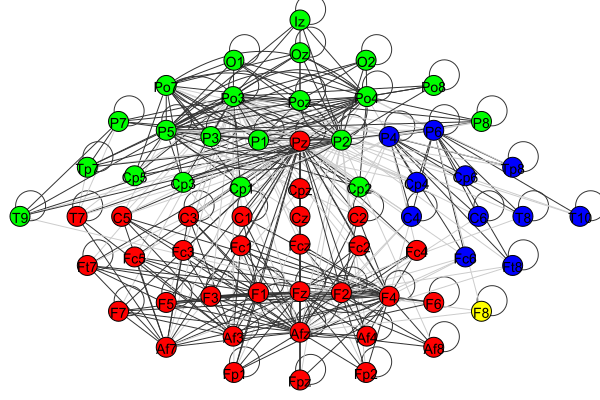

In [138]:
print("At rest in eyes-open conditions")
testplot(part_open, "liouvain_open", visual_style={"layout" : G_open.vs["coordinates"]})

At rest in eyes-closed conditions


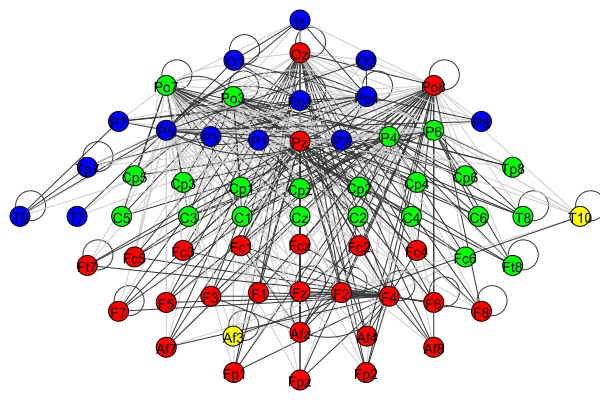

In [139]:
print("At rest in eyes-closed conditions")
testplot(part_closed, "liouvain_closed", visual_style={"layout" : G_open.vs["coordinates"]})

#### 4.3 

Modularity-based vs Information Theory-based approaches

The estimated number of communities for eyes-open case is 2
The estimated number of communities for eyes-closed case is 1
Graphs representations for both cases


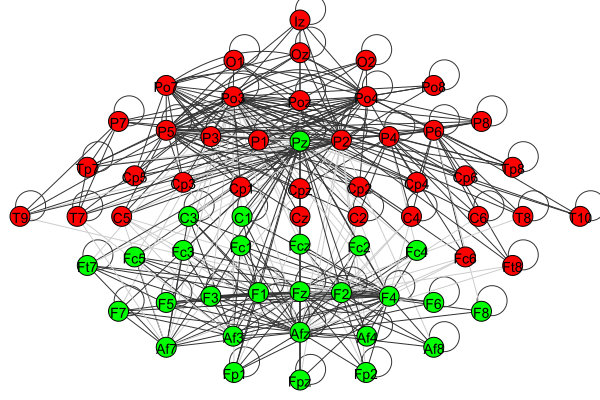

In [144]:
##Case OPEN

weights = G_open.es['weight']
comms_open = G_open.community_infomap(edge_weights = weights,trials = 50)
membership = comms_open.membership
print("The estimated number of communities for eyes-open case is",len(comms_open))

##Case CLOSED

weights = G_closed.es['weight']
comms_closed = G_closed.community_infomap(edge_weights = weights,trials = 50)
membership = comms_closed.membership
print("The estimated number of communities for eyes-closed case is",len(comms_closed))

print("Graphs representations for both cases")
testplot(comms_open, "infoTheo_open", visual_style={"layout" : G_open.vs["coordinates"]})


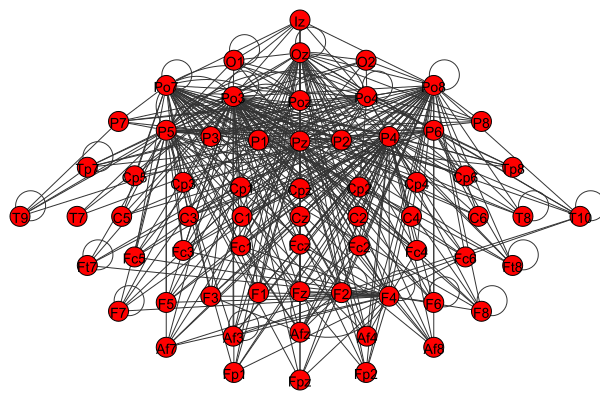

In [143]:
testplot(comms_closed, "infoTheo_closed", visual_style={"layout" : G_open.vs["coordinates"]})